# champsim-builds
10/17/2023

Evaluate prefechers on different ChampSim versions:
- 2022 w/ DRAMsim3 DRAM
- 2022 w/ ChampSim DRAM
- 2023 DRAMsim3
- 2023 ChampSim

Remove *any* benchmark which causes a deadlock on *any* experiment.

In [1]:
import os
import sys
sys.path.append(os.path.abspath("../../"))

from collections import defaultdict
import copy
from importlib import reload
import os

from matplotlib import colormaps
import matplotlib.pyplot as plt
import pandas as pd
# from utils import plots, stats, tables, utils

from plot_utils import collate, plot

# Configuration

In [2]:
sim_dir = "/u/cmolder/GitHub/ChampSim/sim/"
baseline_study = "baseline"
baseline_experiment = "_baseline"
weights_path = "/u/cmolder/GitHub/ChampSim/external/naboo/conf/weights_nodeadlock.toml"

suites = [
    "spec06",
    "spec17",
    "cloudsuite",
    "gap",
    "gap_real"
]
stats  = [
    "cpu.gmean.ipc_improvement",
]
dpi = 150

In [3]:
reload(collate)
studies = {
    "champsim_2022": collate.StudyCollator(
        os.path.join(sim_dir, "dram_champsim_2022", "default_3200"), "prefetchers", 
        baseline_study=baseline_study, 
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
    ),
    "dramsim3_2022": collate.StudyCollator(
        os.path.join(sim_dir, "dram_dramsim3_2022", "default_3200"), "prefetchers", 
        baseline_study=baseline_study, 
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
    ),
    "champsim_2023": collate.StudyCollator(
        os.path.join(sim_dir, "dram_champsim", "default_3200"), "prefetchers", 
        baseline_study=baseline_study, 
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
    ),
    "dramsim3_2023": collate.StudyCollator(
        os.path.join(sim_dir, "dram_dramsim3", "default_3200"), "prefetchers", 
        baseline_study=baseline_study, 
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
    )
}

[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 1498/1498 [00:11<00:00, 129.73file/s]


[ipykernel_launcher][angrist-3] Generating benchmark stats for 79 benchmarks over 7 experiments:
    Benchmarks : omnetpp cc__sx-stackoverflow.mtx pr__netherlands_osm.mtx cc__coPapersCiteseer.mtx gcc sphinx3 cc__netherlands_osm.mtx astar 620.omnetpp cc__amazon0601.mtx libquantum lbm merced soplex bfs__belgium_osm.mtx bfs__netherlands_osm.mtx bwaves bc__sx-stackoverflow.mtx bc__coAuthorsCiteseer.mtx pr__coPapersCiteseer.mtx bc__amazon0601.mtx 605.mcf bc__wikipedia-20060925.mtx bfs__in-2004.mtx 627.cam4 xalancbmk pr__soc-LiveJournal1.mtx bc bc__luxembourg_osm.mtx leslie3d pr__com-Youtube.mtx cc__amazon-2008.mtx pr charlie cassandra cc__belgium_osm.mtx cactusADM bc__com-Youtube.mtx pr__luxembourg_osm.mtx 619.lbm bfs__coAuthorsCiteseer.mtx bc__belgium_osm.mtx cc__com-Youtube.mtx tc zeusmp 649.fotonik3d classifcation pr__belgium_osm.mtx whiskey pr__coAuthorsCiteseer.mtx sssp delta bc__amazon-2008.mtx bfs cc bfs__amazon0601.mtx 623.xalancbmk 607.cactuBSSN bfs__com-Youtube.mtx bc__coPapersCit

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 553/553 [00:03<00:00, 151.55it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 7 suites over 7 experiments:
    Suites     : all cloudsuite gap_real spec17 gap google spec06
    Experiments: spp cygnus_depth cygnus my5 bingo pythia spp_ppf
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 49/49 [00:03<00:00, 15.46it/s]
[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 1554/1554 [00:12<00:00, 120.60file/s]


[ipykernel_launcher][angrist-3] Generating benchmark stats for 82 benchmarks over 7 experiments:
    Benchmarks : omnetpp cc__sx-stackoverflow.mtx pr__netherlands_osm.mtx cc__coPapersCiteseer.mtx gcc sphinx3 cc__netherlands_osm.mtx astar 620.omnetpp cc__amazon0601.mtx libquantum pr__sx-stackoverflow.mtx lbm merced soplex bfs__belgium_osm.mtx bfs__netherlands_osm.mtx bwaves bc__sx-stackoverflow.mtx bc__coAuthorsCiteseer.mtx pr__wikipedia-20060925.mtx pr__coPapersCiteseer.mtx 605.mcf bc__wikipedia-20060925.mtx bfs__in-2004.mtx 627.cam4 xalancbmk pr__soc-LiveJournal1.mtx bc__luxembourg_osm.mtx bc leslie3d pr__com-Youtube.mtx cc__amazon-2008.mtx pr charlie cassandra cc__belgium_osm.mtx cactusADM bc__com-Youtube.mtx pr__luxembourg_osm.mtx 619.lbm bfs__coAuthorsCiteseer.mtx bc__belgium_osm.mtx cc__com-Youtube.mtx bfs__web-Google.mtx tc zeusmp 649.fotonik3d classifcation pr__belgium_osm.mtx whiskey pr__coAuthorsCiteseer.mtx sssp bc__web-Google.mtx delta bfs cc bfs__amazon0601.mtx 623.xalancbm

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 574/574 [00:03<00:00, 150.92it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 7 suites over 7 experiments:
    Suites     : all cloudsuite gap_real spec17 gap google spec06
    Experiments: spp cygnus_depth cygnus my5 bingo pythia spp_ppf
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 49/49 [00:03<00:00, 15.50it/s]
[ipykernel_launcher][angrist-3] Reading study files:   5%|▌         | 114/2200 [00:01<00:18, 110.38file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/cygnus/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:   9%|▊         | 189/2200 [00:02<00:16, 119.76file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/dspatch/pr__soc-LiveJournal1.mtx/pr__soc-LiveJournal1.mtx__687600000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  11%|█         | 241/2200 [00:02<00:17, 114.00file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/bingo/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  15%|█▍        | 322/2200 [00:03<00:16, 111.19file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/sms/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000 because its baseline failed (/u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/baseline/_baseline/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000)
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/spp/bc/bc because it failed


[ipykernel_launcher][angrist-3] Reading study files:  18%|█▊        | 395/2200 [00:04<00:14, 122.36file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/spp_ppf/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000 because its baseline failed (/u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/baseline/_baseline/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000)
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/sms/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  21%|██        | 453/2200 [00:04<00:14, 121.61file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/spp_ppf/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  27%|██▋       | 585/2200 [00:05<00:12, 125.03file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/mlop/bc__wikipedia-20060925.mtx/bc__wikipedia-20060925.mtx__173600000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  30%|██▉       | 653/2200 [00:06<00:13, 114.08file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/my5/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  32%|███▏      | 694/2200 [00:06<00:11, 129.03file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/bingo/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/my5/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__248800000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  41%|████      | 900/2200 [00:08<00:10, 120.43file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/cygnus/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__248800000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  43%|████▎     | 943/2200 [00:08<00:10, 123.48file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/dspatch/soplex/soplex_66B because it failed


[ipykernel_launcher][angrist-3] Reading study files:  47%|████▋     | 1028/2200 [00:09<00:09, 128.71file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/spp/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__290000000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  48%|████▊     | 1057/2200 [00:09<00:09, 125.30file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/pythia/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000 because its baseline failed (/u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/baseline/_baseline/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000)


[ipykernel_launcher][angrist-3] Reading study files:  49%|████▉     | 1082/2200 [00:10<00:09, 112.23file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/dspatch/cc__com-Youtube.mtx/cc__com-Youtube.mtx__11200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  51%|█████     | 1125/2200 [00:10<00:08, 122.98file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/dspatch/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000 because its baseline failed (/u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/baseline/_baseline/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000)


[ipykernel_launcher][angrist-3] Reading study files:  57%|█████▋    | 1255/2200 [00:11<00:09, 104.60file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/spp/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/dspatch/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__248800000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/mlop/pr__soc-LiveJournal1.mtx/pr__soc-LiveJournal1.mtx__687600000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  62%|██████▏   | 1365/2200 [00:12<00:06, 120.63file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/dspatch/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because its baseline failed (/u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/baseline/_baseline/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000)
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/mlop/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because its baseline failed (/u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/baseline/_baseline/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000)


[ipykernel_launcher][angrist-3] Reading study files:  64%|██████▎   | 1398/2200 [00:12<00:05, 137.51file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/cygnus_depth/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000 because its baseline failed (/u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/baseline/_baseline/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000)
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/my5/bc__wikipedia-20060925.mtx/bc__wikipedia-20060925.mtx__173600000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  73%|███████▎  | 1612/2200 [00:14<00:04, 128.94file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/sms/pr__soc-LiveJournal1.mtx/pr__soc-LiveJournal1.mtx__687600000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  78%|███████▊  | 1718/2200 [00:15<00:04, 118.89file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/mlop/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000 because its baseline failed (/u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/baseline/_baseline/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000)
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/my5/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000 because its baseline failed (/u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/baseline/_baseline/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000)


[ipykernel_launcher][angrist-3] Reading study files:  80%|███████▉  | 1750/2200 [00:15<00:03, 120.93file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/spp/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000 because its baseline failed (/u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/baseline/_baseline/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000)


[ipykernel_launcher][angrist-3] Reading study files:  81%|████████  | 1778/2200 [00:15<00:03, 124.18file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/spp/bc__wikipedia-20060925.mtx/bc__wikipedia-20060925.mtx__173600000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  87%|████████▋ | 1910/2200 [00:16<00:02, 119.52file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/cygnus_depth/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  96%|█████████▌| 2117/2200 [00:18<00:00, 131.42file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/cygnus/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000 because its baseline failed (/u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/baseline/_baseline/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000)
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/pythia/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/cygnus_depth/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__248800000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  98%|█████████▊| 2149/2200 [00:18<00:00, 137.00file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/prefetchers/spp/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__248800000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 2200/2200 [00:19<00:00, 113.55file/s]


[ipykernel_launcher][angrist-3] Generating benchmark stats for 80 benchmarks over 10 experiments:
    Benchmarks : omnetpp cc__sx-stackoverflow.mtx pr__netherlands_osm.mtx cc__coPapersCiteseer.mtx gcc sphinx3 cc__netherlands_osm.mtx astar 620.omnetpp cc__amazon0601.mtx libquantum merced lbm soplex bfs__belgium_osm.mtx bfs__netherlands_osm.mtx bwaves bc__sx-stackoverflow.mtx bc__coAuthorsCiteseer.mtx pr__coPapersCiteseer.mtx bc__amazon0601.mtx 605.mcf bc__wikipedia-20060925.mtx bfs__in-2004.mtx 627.cam4 xalancbmk pr__soc-LiveJournal1.mtx bc__luxembourg_osm.mtx bc leslie3d pr__com-Youtube.mtx cc__amazon-2008.mtx pr charlie cassandra cc__belgium_osm.mtx cactusADM bc__com-Youtube.mtx pr__luxembourg_osm.mtx 619.lbm bfs__coAuthorsCiteseer.mtx bc__belgium_osm.mtx cc__com-Youtube.mtx tc zeusmp 649.fotonik3d classifcation pr__belgium_osm.mtx whiskey pr__coAuthorsCiteseer.mtx sssp delta bc__amazon-2008.mtx bfs cc bfs__amazon0601.mtx 623.xalancbmk 607.cactuBSSN bfs__com-Youtube.mtx bc__coPapersCi

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 800/800 [00:04<00:00, 185.36it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 7 suites over 10 experiments:
    Suites     : all cloudsuite gap_real spec17 gap google spec06
    Experiments: spp cygnus_depth dspatch cygnus my5 bingo pythia sms mlop spp_ppf
        


[ipykernel_launcher][angrist-3] Generating suite stats:   3%|▎         | 2/70 [00:01<00:41,  1.65it/s]

[ipykernel_launcher][angrist-3] Skipping benchmark ('spp', 'bc') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('spp', 'bc') in suite "gap" because it is missing results


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 70/70 [00:03<00:00, 17.66it/s]
[ipykernel_launcher][angrist-3] Reading study files:   2%|▏         | 40/2340 [00:01<00:40, 56.74file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/cygnus/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__602800000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/cygnus_depth/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__226800000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:   4%|▍         | 91/2340 [00:01<00:19, 115.76file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/cygnus/cc__web-Google.mtx/cc__web-Google.mtx__19200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/cygnus/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:   7%|▋         | 172/2340 [00:01<00:13, 162.37file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/pythia/cc__web-Google.mtx/cc__web-Google.mtx__19200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/spp_ppf/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__602800000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:   8%|▊         | 190/2340 [00:01<00:13, 162.78file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/cygnus/bfs__web-Google.mtx/bfs__web-Google.mtx__19200000000 because its baseline failed (/u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/baseline/_baseline/bfs__web-Google.mtx/bfs__web-Google.mtx__19200000000)


[ipykernel_launcher][angrist-3] Reading study files:  11%|█         | 249/2340 [00:02<00:11, 184.88file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/dspatch/pr__sx-stackoverflow.mtx/pr__sx-stackoverflow.mtx__506400000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/dspatch/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__226800000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/cygnus/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__226800000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  14%|█▍        | 328/2340 [00:02<00:11, 178.40file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/bingo/cc__web-Google.mtx/cc__web-Google.mtx__19200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/dspatch/cc__web-Google.mtx/cc__web-Google.mtx__19200000000 because its baseline failed (/u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/baseline/_baseline/cc__web-Google.mtx/cc__web-Google.mtx__19200000000)
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/cygnus/bc__dblp-2010.mtx/bc__dblp-2010.mtx__3200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  19%|█▉        | 446/2340 [00:03<00:10, 188.47file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/mlop/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__602800000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/sms/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/sms/pr__sx-stackoverflow.mtx/pr__sx-stackoverflow.mtx__506400000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/bingo/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__602800000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/spp_ppf/pr__sx-stackoverflow.mtx/pr__sx-stackoverflow.mtx__506400000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  22%|██▏       | 505/2340 [00:03<00:10, 183.28file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/spp_ppf/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  23%|██▎       | 542/2340 [00:03<00:10, 168.77file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/cygnus_depth/pr__sx-stackoverflow.mtx/pr__sx-stackoverflow.mtx__506400000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  26%|██▌       | 608/2340 [00:04<00:11, 145.66file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/my5/pr__sx-stackoverflow.mtx/pr__sx-stackoverflow.mtx__506400000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  28%|██▊       | 663/2340 [00:04<00:10, 165.30file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/my5/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__602800000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/my5/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  32%|███▏      | 742/2340 [00:05<00:08, 178.39file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/bingo/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/mlop/pr__sx-stackoverflow.mtx/pr__sx-stackoverflow.mtx__506400000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/pythia/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__226800000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/cygnus_depth/bfs__web-Google.mtx/bfs__web-Google.mtx__19200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  35%|███▌      | 822/2340 [00:05<00:08, 175.44file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/dspatch/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__602800000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  40%|███▉      | 933/2340 [00:06<00:08, 173.88file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/spp_ppf/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__226800000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/mlop/bc__dblp-2010.mtx/bc__dblp-2010.mtx__3200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  44%|████▍     | 1031/2340 [00:06<00:07, 178.80file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/spp/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__226800000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/mlop/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__226800000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  47%|████▋     | 1096/2340 [00:07<00:06, 189.86file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/mlop/cc__soc-LiveJournal1.mtx/cc__soc-LiveJournal1.mtx__295200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/cygnus_depth/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__602800000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  50%|█████     | 1176/2340 [00:07<00:06, 185.61file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/dspatch/cc__com-Youtube.mtx/cc__com-Youtube.mtx__11200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/bingo/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__226800000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  52%|█████▏    | 1214/2340 [00:07<00:06, 180.08file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/spp/pr__sx-stackoverflow.mtx/pr__sx-stackoverflow.mtx__506400000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  56%|█████▌    | 1309/2340 [00:08<00:05, 177.20file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/dspatch/bfs__web-Google.mtx/bfs__web-Google.mtx__19200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/spp_ppf/pr__soc-LiveJournal1.mtx/pr__soc-LiveJournal1.mtx__687600000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/spp/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__602800000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  57%|█████▋    | 1345/2340 [00:08<00:05, 169.08file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/spp/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/bingo/bfs__web-Google.mtx/bfs__web-Google.mtx__19200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  62%|██████▏   | 1455/2340 [00:09<00:05, 175.19file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/dspatch/cc__dblp-2010.mtx/cc__dblp-2010.mtx__5200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/dspatch/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/mlop/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/sms/cc__web-Google.mtx/cc__web-Google.mtx__19200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  64%|██████▍   | 1495/2340 [00:09<00:04, 184.93file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/cygnus_depth/bc__soc-LiveJournal1.mtx/bc__soc-LiveJournal1.mtx__478400000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  67%|██████▋   | 1577/2340 [00:09<00:04, 185.79file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/spp/bfs__web-Google.mtx/bfs__web-Google.mtx__19200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/spp_ppf/bfs__web-Google.mtx/bfs__web-Google.mtx__19200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  70%|██████▉   | 1633/2340 [00:10<00:04, 175.95file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/spp/cc__web-Google.mtx/cc__web-Google.mtx__19200000000 because its baseline failed (/u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/baseline/_baseline/cc__web-Google.mtx/cc__web-Google.mtx__19200000000)


[ipykernel_launcher][angrist-3] Reading study files:  71%|███████▏  | 1671/2340 [00:10<00:03, 182.16file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/cygnus_depth/cc__web-Google.mtx/cc__web-Google.mtx__19200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/my5/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__226800000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  76%|███████▌  | 1784/2340 [00:11<00:03, 177.27file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/mlop/cc__web-Google.mtx/cc__web-Google.mtx__19200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/my5/soplex/soplex_66B because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/my5/cc__web-Google.mtx/cc__web-Google.mtx__19200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  80%|████████  | 1877/2340 [00:11<00:02, 172.31file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/bingo/pr__sx-stackoverflow.mtx/pr__sx-stackoverflow.mtx__506400000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  83%|████████▎ | 1941/2340 [00:11<00:02, 195.18file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/sms/bfs__web-Google.mtx/bfs__web-Google.mtx__19200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/cygnus/pr__sx-stackoverflow.mtx/pr__sx-stackoverflow.mtx__506400000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/mlop/bfs__web-Google.mtx/bfs__web-Google.mtx__19200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  86%|████████▌ | 2005/2340 [00:12<00:01, 178.76file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/pythia/pr__sx-stackoverflow.mtx/pr__sx-stackoverflow.mtx__506400000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/sms/bc__web-Google.mtx/bc__web-Google.mtx__19200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/my5/bfs__web-Google.mtx/bfs__web-Google.mtx__19200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  87%|████████▋ | 2044/2340 [00:12<00:01, 175.84file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/cygnus_depth/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  91%|█████████ | 2126/2340 [00:13<00:01, 170.17file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/spp_ppf/cc__web-Google.mtx/cc__web-Google.mtx__19200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  95%|█████████▌| 2223/2340 [00:13<00:00, 182.66file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/sms/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__226800000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/pythia/bfs__web-Google.mtx/bfs__web-Google.mtx__19200000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files:  97%|█████████▋| 2278/2340 [00:13<00:00, 170.79file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/pythia/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__263200000000 because it failed
[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/sms/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__602800000000 because it failed


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 2340/2340 [00:14<00:00, 164.02file/s]


[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers/pythia/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__602800000000 because it failed
[ipykernel_launcher][angrist-3] Generating benchmark stats for 85 benchmarks over 10 experiments:
    Benchmarks : omnetpp cc__sx-stackoverflow.mtx pr__netherlands_osm.mtx cc__coPapersCiteseer.mtx gcc sphinx3 cc__netherlands_osm.mtx astar 620.omnetpp cc__amazon0601.mtx libquantum pr__sx-stackoverflow.mtx lbm merced soplex bfs__belgium_osm.mtx bfs__netherlands_osm.mtx bwaves bc__sx-stackoverflow.mtx bc__coAuthorsCiteseer.mtx pr__wikipedia-20060925.mtx pr__coPapersCiteseer.mtx bc__amazon0601.mtx 605.mcf bc__wikipedia-20060925.mtx bfs__in-2004.mtx 627.cam4 xalancbmk pr__soc-LiveJournal1.mtx bc__luxembourg_osm.mtx bc leslie3d pr__com-Youtube.mtx cc__amazon-2008.mtx pr charlie cassandra cc__belgium_osm.mtx cactusADM bc__com-Youtube.mtx pr__luxembourg_osm.mtx 619.lbm bfs__coAuthorsCiteseer.m

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 850/850 [00:04<00:00, 185.19it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 7 suites over 10 experiments:
    Suites     : all cloudsuite gap_real spec17 gap google spec06
    Experiments: spp cygnus_depth dspatch cygnus my5 bingo pythia sms mlop spp_ppf
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 70/70 [00:04<00:00, 15.01it/s]


# Build configurations
Dynamic degree

In [5]:
degreedyn_1core_df = {
    "Cygnus (2022 csim)": studies["champsim_2022"]["cygnus"],
    "Cygnus (2022 ds3)" : studies["dramsim3_2022"]["cygnus"],
    "Cygnus (2023 csim)": studies["champsim_2023"]["cygnus"],
    "Cygnus (2023 ds3)" : studies["dramsim3_2023"]["cygnus"],
    "my5 (2022 csim)"   : studies["champsim_2022"]["my5"],
    "my5 (2022 ds3)"    : studies["dramsim3_2022"]["my5"],
    "my5 (2023 csim)"   : studies["champsim_2023"]["my5"],
    "my5 (2023 ds3)"    : studies["dramsim3_2023"]["my5"],
}
degreedyn_1core_colors = defaultdict(lambda: None, {
    "Cygnus (2022 csim)": colormaps["Set3"](0),
    "Cygnus (2022 ds3)" : colormaps["Set3"](0),
    "Cygnus (2023 csim)": colormaps["Set3"](0),
    "Cygnus (2023 ds3)" : colormaps["Set3"](0),
    "my5 (2022 csim)"   : colormaps["Set3"](9),
    "my5 (2022 ds3)"    : colormaps["Set3"](9),
    "my5 (2023 csim)"   : colormaps["Set3"](9),
    "my5 (2023 ds3)"    : colormaps["Set3"](9),
})
degreedyn_1core_hatches = defaultdict(lambda: None, {
    "Cygnus (2022 csim)": None,
    "Cygnus (2022 ds3)" : "/",
    "Cygnus (2023 csim)": ".",
    "Cygnus (2023 ds3)" : "-",
    "my5 (2022 csim)"   : None,
    "my5 (2022 ds3)"    : "/",
    "my5 (2023 csim)"   : ".",
    "my5 (2023 ds3)"    : "-",
})
degreedyn_1core_legend_kwargs = {
    "ncol": 2,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
degreedyn_1core_legend_kwargs_wide = {
    "ncol": 2,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
degreedyn_1core_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

## IPC improvement

In [6]:
reload(plot)
plot.get_suite_table(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gap_real,gmean
Cygnus (2022 csim),30.53,16.52,3.50,28.95,20.74,19.636786
Cygnus (2022 ds3),33.67,25.50,10.80,22.13,20.33,22.259536
Cygnus (2023 csim),16.56,12.72,3.14,35.43,23.56,17.791536
Cygnus (2023 ds3),20.41,16.40,5.96,27.12,23.50,18.447982
my5 (2022 csim),31.56,17.86,6.42,24.57,17.58,19.303201
my5 (2022 ds3),30.19,21.92,8.43,18.33,15.87,18.733585
my5 (2023 csim),26.38,15.13,3.76,35.13,22.61,20.125414
my5 (2023 ds3),22.70,17.93,4.65,24.85,20.68,17.935999


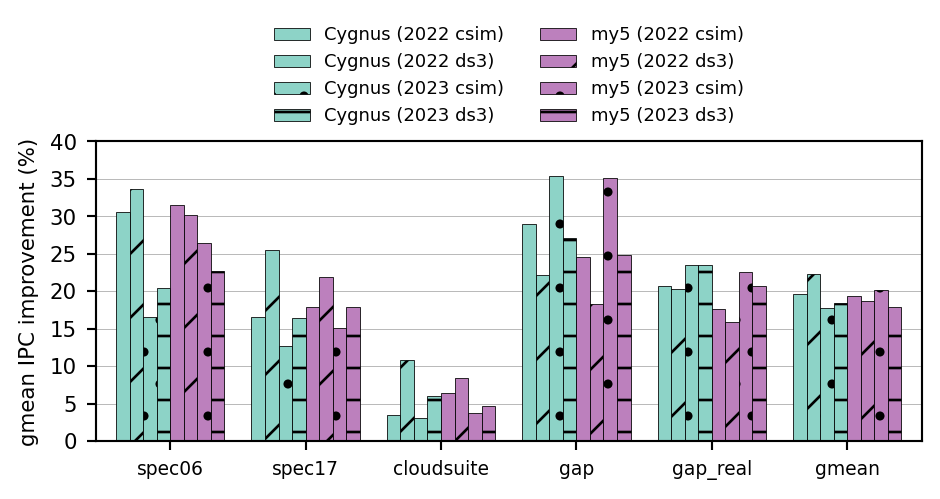

In [8]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(0, 40),
    ytick_distance=5,
    dpi=192, figsize=(5, 2.7)
)
plt.savefig("champsim_builds.png")

### spec06

In [22]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (2022 csim),Cygnus (2022 ds3),Cygnus (2023 csim),Cygnus (2023 ds3),my5 (2022 csim),my5 (2022 ds3),my5 (2023 csim),my5 (2023 ds3)
GemsFDTD,50.570000,78.110000,31.710000,46.91000,56.450000,62.960000,70.570000,55.580000
astar,6.760000,6.650000,7.190000,6.79000,2.200000,2.030000,2.600000,2.230000
bwaves,115.550000,43.490000,39.880000,18.01000,63.210000,20.870000,73.090000,20.890000
cactusADM,51.690000,66.100000,41.050000,80.75000,42.650000,41.820000,51.570000,49.580000
gcc,27.220000,32.510000,10.630000,20.13000,24.570000,24.700000,12.960000,16.800000
lbm,15.730000,50.490000,-7.620000,17.99000,14.620000,49.580000,-7.520000,14.810000
leslie3d,40.210000,30.870000,30.960000,17.45000,39.500000,25.130000,43.520000,19.190000
libquantum,67.320000,66.850000,51.250000,50.66000,88.360000,67.040000,76.210000,66.520000
mcf,14.900000,11.830000,9.520000,8.45000,17.860000,24.580000,13.960000,24.840000
milc,2.030000,8.870000,3.160000,0.33000,16.400000,25.880000,15.010000,14.680000


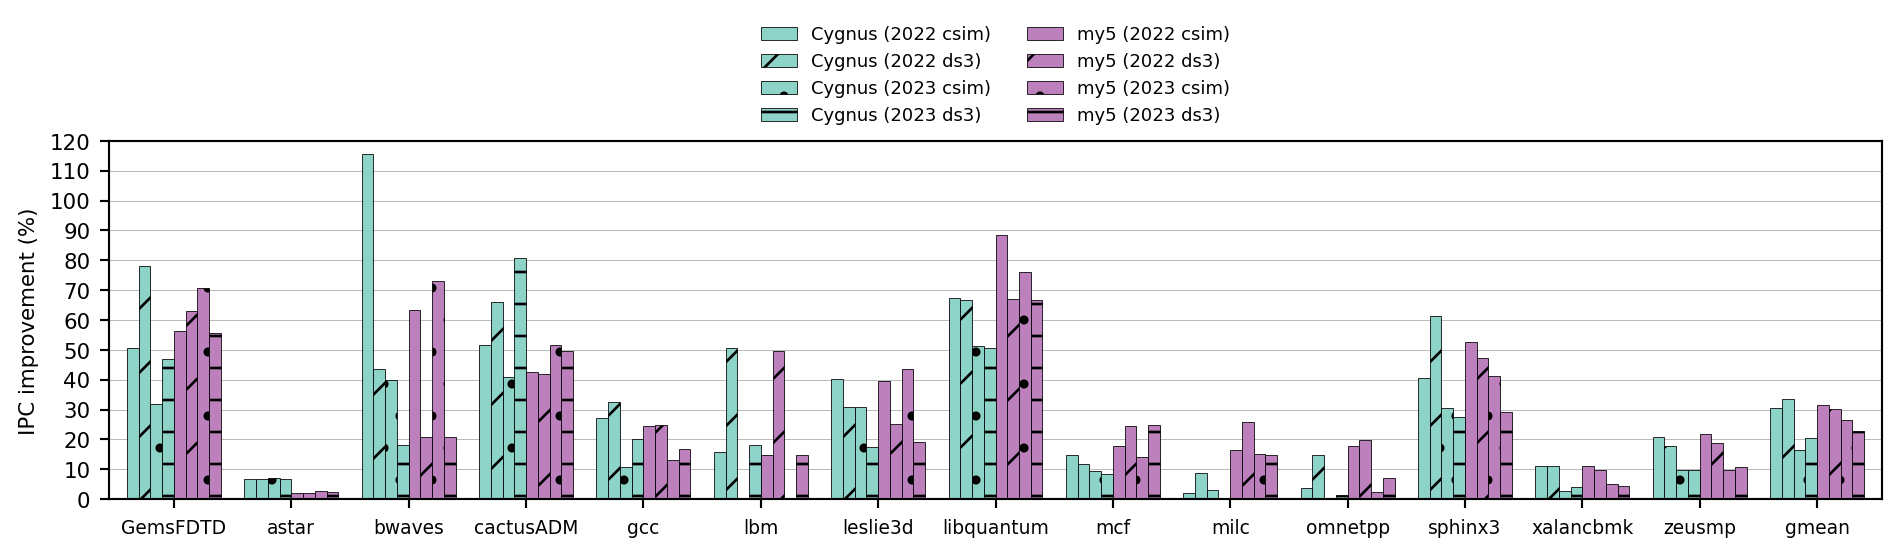

In [9]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 120),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))
plt.savefig("champsim_builds_spec06.png")

### spec17

In [24]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (2022 csim),Cygnus (2022 ds3),Cygnus (2023 csim),Cygnus (2023 ds3),my5 (2022 csim),my5 (2022 ds3),my5 (2023 csim),my5 (2023 ds3)
602.gcc,71.040000,66.730000,69.100000,71.860000,68.630000,64.410000,69.950000,71.980000
605.mcf,-1.130000,6.730000,-2.410000,-1.540000,10.760000,10.530000,11.640000,4.530000
607.cactuBSSN,37.940000,28.870000,27.820000,23.690000,30.530000,11.690000,25.150000,7.130000
619.lbm,2.360000,22.640000,1.410000,15.090000,2.630000,21.990000,0.350000,19.940000
620.omnetpp,5.720000,9.370000,-3.480000,0.500000,11.120000,10.920000,2.290000,2.750000
623.xalancbmk,12.210000,11.420000,7.400000,7.450000,14.980000,14.320000,13.370000,13.660000
627.cam4,0.840000,2.350000,0.580000,1.940000,0.290000,0.710000,-0.070000,0.580000
628.pop2,11.140000,18.370000,7.840000,13.450000,6.310000,9.760000,5.370000,7.790000
649.fotonik3d,24.740000,86.030000,22.180000,30.410000,28.710000,71.520000,22.150000,50.860000
gmean,16.522269,25.502072,12.723833,16.401861,17.855872,21.921119,15.130894,17.930876


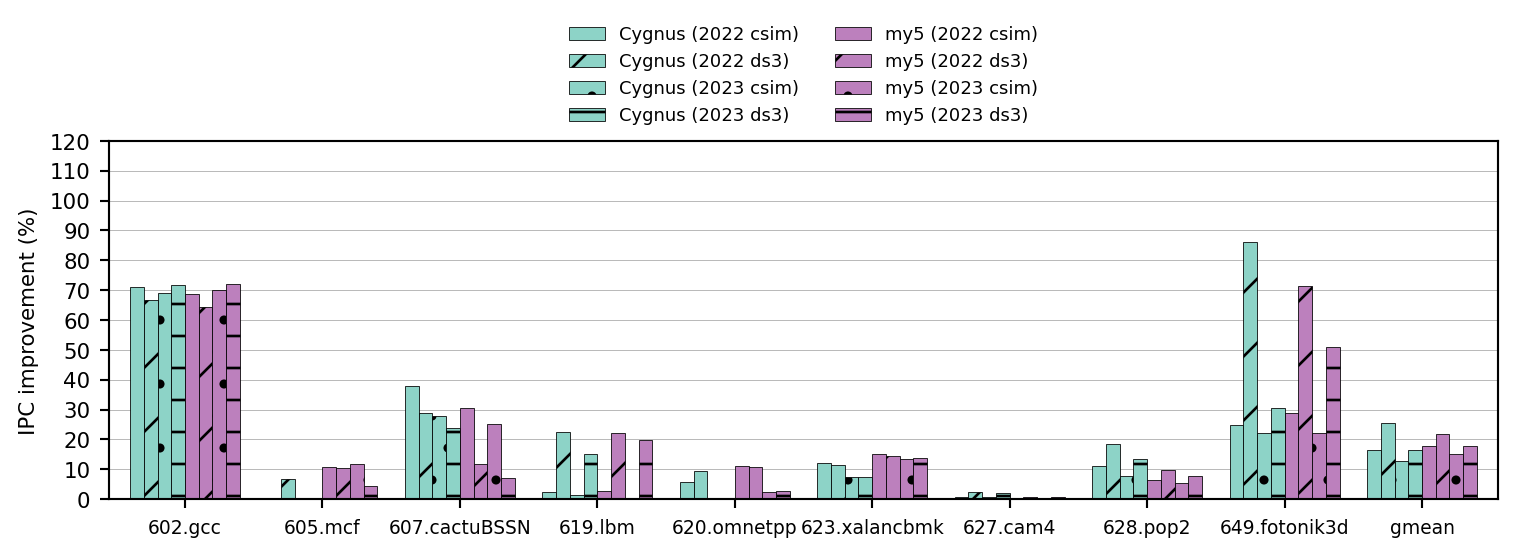

In [10]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 120),
    ytick_distance=10,
    dpi=192, figsize=(8, 3))
plt.savefig("champsim_builds_spec17.png")

### cloudsuite

In [27]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (2022 csim),Cygnus (2022 ds3),Cygnus (2023 csim),Cygnus (2023 ds3),my5 (2022 csim),my5 (2022 ds3),my5 (2023 csim),my5 (2023 ds3)
cassandra,3.130,10.470000,-1.220000,2.930000,14.470000,10.900000,4.070000,4.500000
classifcation,-10.830,-10.550000,-2.210000,-2.010000,-0.720000,-1.610000,0.870000,0.670000
cloud9,20.190,26.300000,13.630000,15.300000,6.830000,8.140000,6.690000,6.860000
nutch,3.830,20.770000,3.090000,8.380000,5.630000,17.150000,3.500000,6.680000
gmean,3.502,10.801791,3.137893,5.955998,6.416382,8.430832,3.761899,4.647446


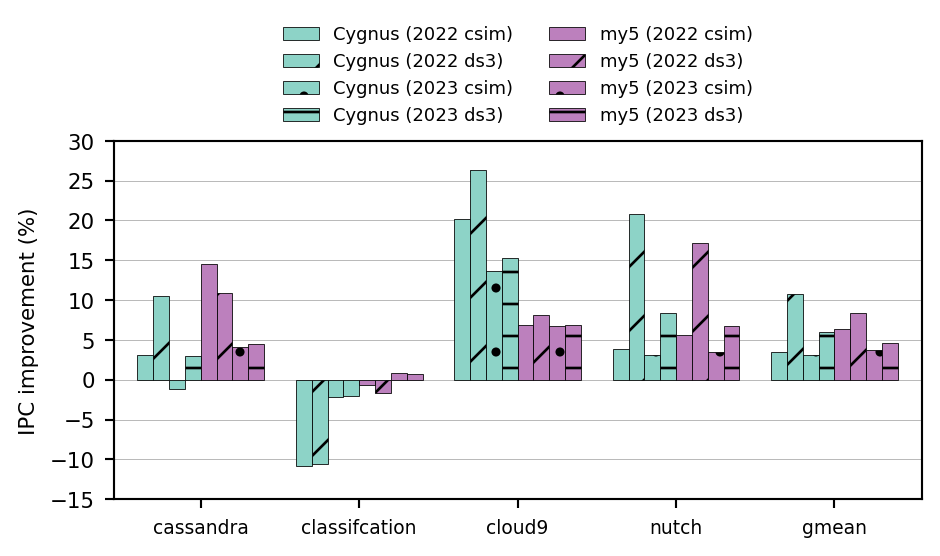

In [11]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-15, 30),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))
plt.savefig("champsim_builds_cloudsuite.png")

### google

In [29]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "google", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (2022 csim),Cygnus (2022 ds3),Cygnus (2023 csim),Cygnus (2023 ds3),my5 (2022 csim),my5 (2022 ds3),my5 (2023 csim),my5 (2023 ds3)
charlie,4.950000,20.670000,-1.630000,14.240000,9.490000,10.73000,2.200000,6.390000
delta,0.940000,24.110000,-14.230000,4.630000,23.940000,20.35000,1.580000,2.150000
merced,13.820000,20.340000,13.080000,17.240000,5.160000,4.93000,2.690000,2.400000
whiskey,-2.020000,12.240000,-7.410000,3.270000,10.770000,10.52000,2.020000,2.930000
gmean,4.255852,19.258938,-3.052416,9.680924,12.128153,11.49695,2.121726,3.453521


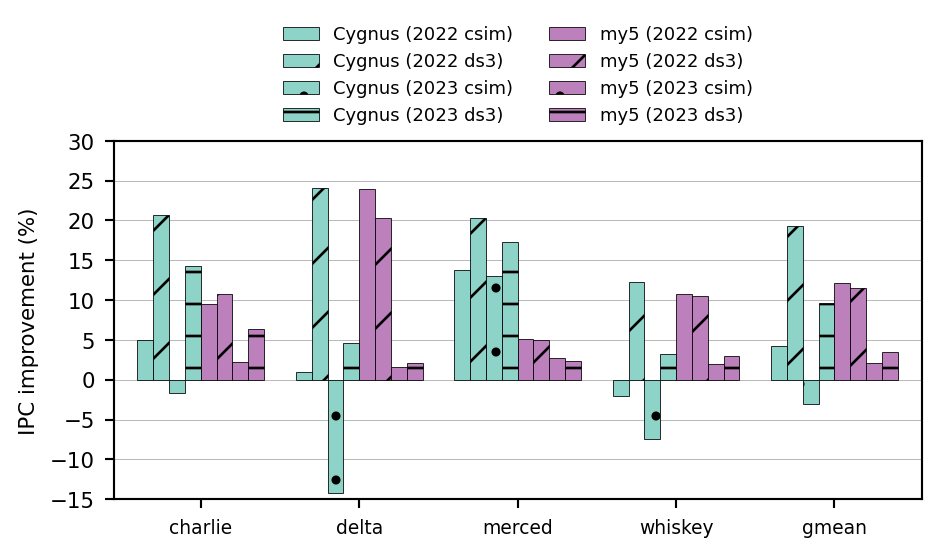

In [12]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "google", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-15, 30),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))
plt.savefig("champsim_builds_google.png")

### gap

In [31]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (2022 csim),Cygnus (2022 ds3),Cygnus (2023 csim),Cygnus (2023 ds3),my5 (2022 csim),my5 (2022 ds3),my5 (2023 csim),my5 (2023 ds3)
bc,14.020000,11.940000,14.750000,11.990000,12.390000,9.920000,15.940000,11.0700
bfs,87.440000,63.080000,103.370000,77.470000,61.680000,44.030000,73.000000,55.6100
cc,38.890000,34.990000,33.860000,34.960000,38.270000,34.360000,33.520000,34.5000
pr,1.950000,2.790000,34.350000,19.970000,1.400000,2.140000,59.140000,28.4900
sssp,13.580000,8.210000,5.110000,5.990000,9.440000,4.340000,1.370000,1.9600
tc,33.790000,21.080000,39.890000,23.760000,34.050000,21.090000,40.910000,24.3400
gmean,28.954897,22.132069,35.433613,27.127016,24.575355,18.329339,35.127183,24.8469


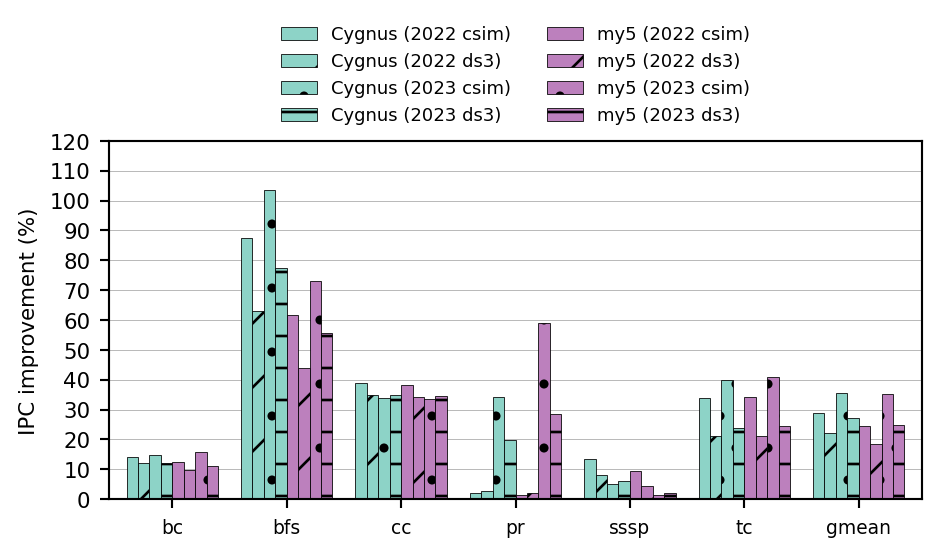

In [13]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 120),
    ytick_distance=10,
    dpi=192, figsize=(5, 3))
plt.savefig("champsim_builds_gap.png")

### gap_real

In [33]:
reload(plot)
pd.set_option("display.max_rows", 500)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap_real", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (2022 csim),Cygnus (2022 ds3),Cygnus (2023 csim),Cygnus (2023 ds3),my5 (2022 csim),my5 (2022 ds3),my5 (2023 csim),my5 (2023 ds3)
bc__amazon-2008.mtx,1.560000,6.220000,-1.570000,4.460000,1.930000,2.250000,1.580000,1.910000
bc__amazon0601.mtx,0.060000,2.610000,-1.640000,1.940000,1.730000,1.760000,1.460000,1.550000
bc__belgium_osm.mtx,4.790000,6.050000,4.080000,6.480000,2.620000,2.320000,2.300000,2.290000
bc__coAuthorsCiteseer.mtx,-0.240000,5.360000,-3.050000,3.990000,2.340000,2.910000,1.680000,2.300000
bc__coPapersCiteseer.mtx,12.440000,13.780000,6.780000,9.310000,14.460000,11.710000,10.370000,8.430000
bc__com-Youtube.mtx,0.700000,8.280000,-3.600000,4.550000,1.700000,4.310000,-0.910000,2.430000
bc__luxembourg_osm.mtx,11.670000,10.580000,15.670000,14.920000,5.080000,4.930000,6.230000,6.160000
bc__netherlands_osm.mtx,6.980000,7.220000,5.110000,7.370000,2.580000,2.320000,2.140000,2.150000
bfs__amazon-2008.mtx,39.320000,32.140000,34.890000,34.060000,37.050000,29.270000,34.390000,32.090000
bfs__amazon0601.mtx,38.990000,30.910000,33.930000,31.940000,36.800000,27.890000,32.770000,29.620000
